In [7]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from collections import defaultdict



In [8]:
# Đường dẫn đến thư mục chứa các file XML
xml_files_dir = r'C:\Users\ADMIN\OneDrive - Hanoi University of Science and Technology\Desktop\Annotations'

def parse_xml_for_objects(xml_filepath):
    """
    Hàm này đọc file XML và trả về danh sách các kích thước đối tượng trong ảnh.
    """
    tree = ET.parse(xml_filepath)
    root = tree.getroot()
    
    object_sizes = []
    
    # Lặp qua tất cả các đối tượng trong ảnh
    for obj in root.findall('object'):
        x_min = int(obj.find('bndbox/xmin').text)
        y_min = int(obj.find('bndbox/ymin').text)
        x_max = int(obj.find('bndbox/xmax').text)
        y_max = int(obj.find('bndbox/ymax').text)
        
        # Tính kích thước vùng bao đối tượng (width * height)
        width = x_max - x_min
        height = y_max - y_min
        size = width * height
        
        object_sizes.append(size)
    
    return object_sizes



In [9]:
def get_largest_and_smallest_objects(objects_sizes):
    """
    Hàm này trả về đối tượng lớn nhất và nhỏ nhất trong danh sách các kích thước đối tượng.
    """
    if len(objects_sizes) == 0:
        return None, None
    return max(objects_sizes), min(objects_sizes)


In [10]:
def process_xml_files(xml_files_dir):
    """
    Hàm này xử lý tất cả các tệp XML trong thư mục và trả về danh sách các cặp giá trị 
    (object lớn nhất, object nhỏ nhất) của từng bức ảnh.
    Đồng thời, tạo biểu đồ phân phối số lượng đối tượng trên toàn bộ thư mục.
    """
    largest_and_smallest_objects = []
    object_count_distribution = []
    
    for xml_file in os.listdir(xml_files_dir):
        xml_filepath = os.path.join(xml_files_dir, xml_file)
        
        # Đọc danh sách kích thước các đối tượng từ tệp XML
        object_sizes = parse_xml_for_objects(xml_filepath)
        
        # Lưu số lượng đối tượng vào danh sách để vẽ biểu đồ
        object_count_distribution.append(len(object_sizes))
        
        # Lấy đối tượng lớn nhất và nhỏ nhất
        largest, smallest = get_largest_and_smallest_objects(object_sizes)
        largest_and_smallest_objects.append((largest, smallest))
    
    return largest_and_smallest_objects, object_count_distribution


In [11]:
def plot_object_count_distribution(object_count_distribution):
    """
    Hàm này tạo biểu đồ phân phối số lượng đối tượng trong thư mục.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(object_count_distribution, bins=range(1, max(object_count_distribution) + 2), alpha=0.75, color='blue', edgecolor='black')
    plt.title('Phân phối số lượng đối tượng trên mỗi ảnh')
    plt.xlabel('Số lượng đối tượng')
    plt.ylabel('Số lượng ảnh')
    plt.grid(True)
    plt.show()


In [12]:

# Xử lý các file XML
largest_and_smallest_objects, object_count_distribution = process_xml_files(xml_files_dir)

# In danh sách các cặp giá trị (đối tượng lớn nhất, đối tượng nhỏ nhất) cho từng ảnh
for idx, (largest, smallest) in enumerate(largest_and_smallest_objects):
    print(f"Ảnh {idx+1}: Lớn nhất = {largest}, Nhỏ nhất = {smallest}")

Ảnh 1: Lớn nhất = 167184, Nhỏ nhất = 19257
Ảnh 2: Lớn nhất = 6868, Nhỏ nhất = 6868
Ảnh 3: Lớn nhất = 3680, Nhỏ nhất = 3332
Ảnh 4: Lớn nhất = 8142, Nhỏ nhất = 999
Ảnh 5: Lớn nhất = 35690, Nhỏ nhất = 98
Ảnh 6: Lớn nhất = 40076, Nhỏ nhất = 40076
Ảnh 7: Lớn nhất = 56430, Nhỏ nhất = 23744
Ảnh 8: Lớn nhất = 52428, Nhỏ nhất = 52428
Ảnh 9: Lớn nhất = 13524, Nhỏ nhất = 13524
Ảnh 10: Lớn nhất = 38430, Nhỏ nhất = 1710
Ảnh 11: Lớn nhất = 62826, Nhỏ nhất = 62826
Ảnh 12: Lớn nhất = 81423, Nhỏ nhất = 81423
Ảnh 13: Lớn nhất = 54000, Nhỏ nhất = 12834
Ảnh 14: Lớn nhất = 65648, Nhỏ nhất = 1776
Ảnh 15: Lớn nhất = 43750, Nhỏ nhất = 43750
Ảnh 16: Lớn nhất = 149902, Nhỏ nhất = 149902
Ảnh 17: Lớn nhất = 51756, Nhỏ nhất = 51756
Ảnh 18: Lớn nhất = 69242, Nhỏ nhất = 69242
Ảnh 19: Lớn nhất = 97929, Nhỏ nhất = 97929
Ảnh 20: Lớn nhất = 8901, Nhỏ nhất = 3360
Ảnh 21: Lớn nhất = 91154, Nhỏ nhất = 91154
Ảnh 22: Lớn nhất = 150176, Nhỏ nhất = 21900
Ảnh 23: Lớn nhất = 38164, Nhỏ nhất = 38164
Ảnh 24: Lớn nhất = 17088, Nhỏ 

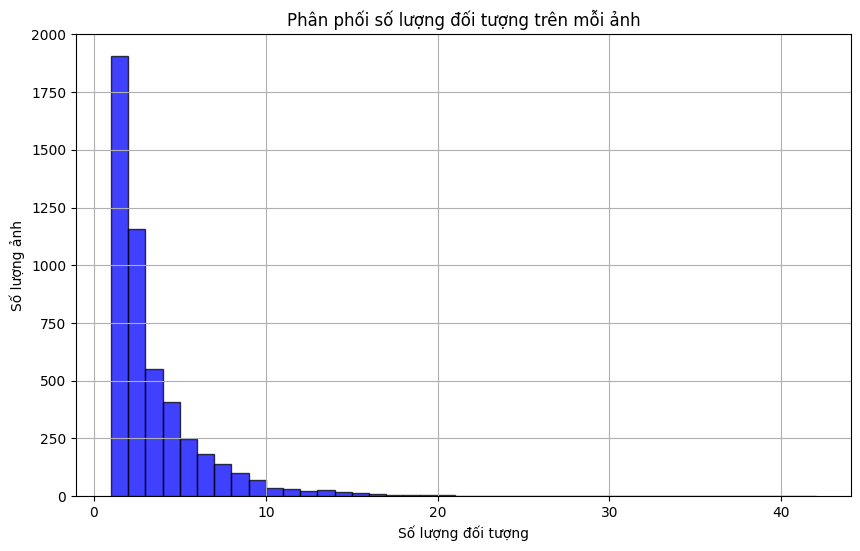

In [13]:
# Vẽ biểu đồ phân phối số lượng đối tượng
plot_object_count_distribution(object_count_distribution)

In [14]:
def parse_xml_for_objects(file_path):
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()
    
    # Lấy danh sách các đối tượng
    object_counts = defaultdict(int)
    for obj in root.findall('object'):
        obj_name = obj.find('name').text
        object_counts[obj_name] += 1
    
    return object_counts

def count_objects_in_folder(folder_path):
    total_object_counts = defaultdict(int)
    
    # Duyệt qua tất cả các file trong thư mục
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.xml'):
            file_path = os.path.join(folder_path, file_name)
            image_object_counts = parse_xml_for_objects(file_path)
            
            # Cộng dồn số lượng object vào tổng số
            for obj_name, count in image_object_counts.items():
                total_object_counts[obj_name] += count
    
    return total_object_counts

# Đường dẫn đến thư mục chứa file XML
folder_path = 'path_to_your_xml_folder'  # Thay thế bằng đường dẫn thư mục chứa các file XML

# Đếm số lượng object
object_counts = count_objects_in_folder(xml_files_dir)

# In kết quả
for obj_name, count in object_counts.items():
    print(f"{obj_name}: {count}")

dog: 530
person: 5227
train: 302
sofa: 396
chair: 1374
car: 1541
pottedplant: 592
diningtable: 299
horse: 395
cat: 370
cow: 329
bus: 254
bicycle: 389
motorbike: 369
bird: 576
tvmonitor: 361
sheep: 311
aeroplane: 311
boat: 393
bottle: 657
